<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/ANN_Ajuste_mar_2021/PSD_GRAIN_NOT_GRAIN_kNN_abril_07_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 4.6MB/s 


In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [4]:
import mahotas.features.texture as mht
import mahotas.features

In [5]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 336 (delta 55), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (336/336), 1.10 MiB | 8.07 MiB/s, done.
Resolving deltas: 100% (192/192), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021


In [6]:
!ls

ANN_Ajuste_mar_2021
ANN_FIND_GRAIN_MAR_2021.py
ANN_FIND_GRAIN_NOVO.py
ANN_FIND_GRAIN_PAPER_STEP_02.py
big_segment.py
CNN_classify_grain_feb_15_2021.ipynb
CNN_DESCRIPTION.ipynb
CNN_FIND_GRAIN_PAPER_STEP_02.py
EPOCHS_graphic.csv
EPOCHS_graphic.txt
Fig_05_BIG_Segmentation_jan_25_2021.ipynb
GetBetterSegm.py
Get_PSDArea_New.py
Graphic_Epochs_fev_09_2020.ipynb
histogram_fev_2021.py
PSD_CNN_GRAIN_NOT_GRAIN_step_02_paper.ipynb
PSD_GRAIN_NOT_GRAIN_dez_04_2020.ipynb
PSD_GRAIN_NOT_GRAIN_fev_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_11_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_12_2021.ipynb
PSD_GRAIN_NOT_GRAIN_step_02_paper.ipynb
psd_mahotas.py
__pycache__
README.md
Segment_Ajuste_mar_2021
SEGMENT_NOT_CONCLUDED.ipynb


In [7]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 308 (delta 23), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (308/308), 78.60 MiB | 30.87 MiB/s, done.
Resolving deltas: 100% (146/146), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado


In [8]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 308 (delta 23), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (308/308), 115.76 MiB | 32.30 MiB/s, done.
Resolving deltas: 100% (140/140), done.


In [10]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 336 (delta 55), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (336/336), 1.10 MiB | 7.53 MiB/s, done.
Resolving deltas: 100% (192/192), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021


In [11]:
from big_segment import Segmenta  # got image provided segmented
# from ANN_FIND_GRAIN_NOVO import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [12]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021
%cd ANN_Ajuste_mar_2021

fatal: destination path 'ANN_Ajuste_mar_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021


In [13]:
from knn_find_grain_change_classification import knnGrain  # got image provided segmented

In [14]:
!ls

ANN_deploy_neural_network_mar_22_2021.ipynb
ANN_FIND_GRAIN_change_ann.py
ANN_load_neural_network_mar_23_2021.ipynb
ANN_load_top_okay_neural_network_mar_23_2021.ipynb
ANN_neural_network_load_mar_22_2021.ipynb
big_segment_new.py
knn_find_grain_change_classification.py
PSD_find_neural_network_mar_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_18_2021.ipynb
__pycache__


In [15]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 308 (delta 23), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (308/308), 78.60 MiB | 31.93 MiB/s, done.
Resolving deltas: 100% (146/146), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado


In [16]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [17]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 308 (delta 23), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (308/308), 78.60 MiB | 29.06 MiB/s, done.
Resolving deltas: 100% (146/146), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado/Doutorado


In [18]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

img=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [19]:
df=Segmenta(img)

In [20]:
y_pred,confusion_matrix,METRICS=knnGrain(ANN_dat,df.drop('Width',axis=1)) 

Predicted   0   1
Actual           
0          72   0
1           0  75


In [21]:
print(METRICS)
# grain class is number zero

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        75

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147



In [22]:
# print(y_pred.ravel())

In [23]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 1):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [24]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [25]:
df.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,173,52.872757,53.728920,59.325806,60.292156,57.998730,58.109722,57.703796,59.248917,60.037991,59.310196,61.620735,63.581570,66.100334,61.298504,39.878212,57.052258,80.894539,80.362946,77.668617,81.454506,106.891350,127.292618,136.956619,138.957153,142.758255,146.882355,157.592987,158.367096,51.519230,53.854221,57.775196,59.743923,59.326939,60.420525,59.693306,59.160713,61.792603,60.705433,61.656685,...,124.970131,110.674019,127.236084,132.699539,135.938980,134.344009,130.533463,117.243607,113.893715,124.189011,134.999619,143.229431,74.362259,76.995224,74.999298,71.013527,71.608070,80.220123,90.344582,103.699646,105.596336,127.365051,130.560715,130.100494,125.727852,123.737953,125.252899,140.074966,154.203094,115.440178,137.557098,141.606430,137.440536,133.375717,133.240402,134.625809,123.142532,124.429451,134.788193,143.010391
1,176,139.509308,139.611053,131.406494,114.787186,106.336769,91.242249,77.724693,71.632225,84.448875,99.655472,111.201447,116.169426,115.383781,110.696274,110.380157,107.262390,101.577988,97.741219,92.786148,90.730377,88.736046,89.900307,97.038742,97.563011,63.309399,41.708164,52.791836,79.853821,142.072845,151.587296,156.583176,156.475723,160.348633,165.176132,173.155975,161.857941,115.664772,83.572830,88.168907,...,98.462296,95.159607,92.309402,90.399796,89.755157,90.752579,93.795975,93.345558,89.796486,63.925617,53.693184,52.869835,92.371384,103.153923,113.208672,118.799583,127.710739,141.813019,148.380676,159.811462,208.680252,243.037186,148.421997,110.120346,114.518600,112.830048,106.688530,100.241730,96.701447,96.632225,92.920456,89.204025,91.578506,93.764465,97.454536,103.205055,87.322830,61.407539,51.351242,55.185951
2,160,73.736252,75.952499,82.419365,87.552498,87.341255,73.099998,62.148746,64.527496,63.084999,59.932495,58.886250,59.403751,59.584999,60.805622,62.812500,61.451244,59.957497,61.577496,63.484997,64.253754,66.596245,69.770615,70.141869,57.924377,57.280628,77.406250,84.106873,90.248123,71.189369,75.365623,81.113747,87.931877,90.563744,73.285629,62.135624,60.123116,61.826248,67.082497,61.628750,...,120.720001,123.866249,126.927505,129.731247,128.343735,96.376251,97.352493,93.064987,89.998123,87.064377,80.305618,73.763123,194.708740,170.579987,164.482498,145.838120,156.198746,146.513748,139.958740,147.318115,146.565613,123.839371,114.237503,117.190002,115.821251,116.174988,115.697495,116.161247,117.353745,121.881241,126.333748,130.474365,121.639992,78.961250,95.896866,92.866241,88.253754,84.899376,83.604370,78.401871
3,170,0.000000,0.068097,0.794602,1.000000,1.000000,1.000000,1.000000,1.284014,1.976747,2.000000,2.021315,2.005813,2.213011,2.118339,1.961107,1.000000,1.000000,0.930242,0.189343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025467,0.825467,1.000000,1.000000,1.000000,1.048166,1.517647,1.721938,2.000000,1.988374,1.992249,...,112.879738,114.135368,115.414955,117.901871,120.732330,127.991013,127.894272,108.735786,96.726654,97.653702,98.546173,101.540207,57.589626,57.248310,102.098145,132.421722,132.011078,133.613297,140.680695,150.808029,169.579514,189.728729,203.035431,202.107544,122.844589,112.758217,115.283333,118.143394,120.913498,121.146019,118.872116,118.763603,121.928177,125.199043,120.700905,100.666023,100.127342,104.532875,113.156548,115.419250
4,184,101.189026,103.021736,102.365784,106.360580,118.102547,106.023621,106.226837,120.102066,133.282135,143.271729,142.543930,66.694702,28.252832,36.896500,58.706520,77.171066,82.917763,84.481094,85.341682,86.325607,85.446594,84.308601,73.397438,46.899338,17.938562,46.032604,76.590263,76.493851,107.200836,106.296295,102.959358,96.704155,97.674370,102.232513,103.155472,112.957939,124.363892,133.900284,137.630890,...,14

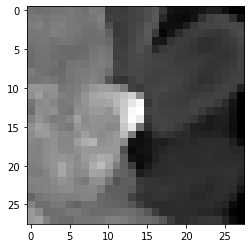

In [30]:
Size=28
qual_img=23
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")